<a href="https://colab.research.google.com/github/AmithChatriki/Data-Analysis/blob/main/Flight_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
print(os.getcwd())

/content


In [6]:
filepath = 'Clean_Dataset.csv'
my_data = pd.read_csv(filepath, usecols=lambda col: col!='Unnamed: 0')

# **Data Preprocessing**

In [24]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [25]:
my_data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

We seem to have 0 missing values.

# **Detect Outliers**

Text(0.5, 0, 'Flight Price')

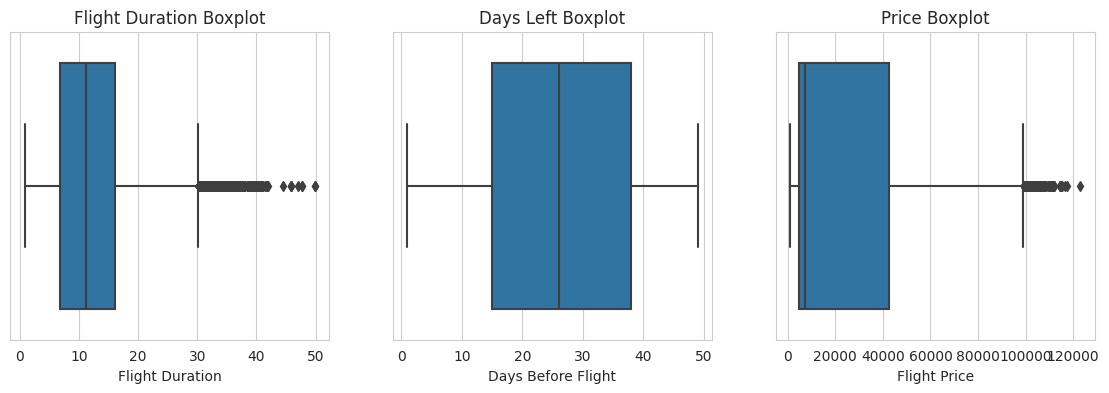

In [30]:
# Boxplots to check for outliers
fig, ax = plt.subplots(1,3, figsize=(14,4))

sns.boxplot(x=my_data['duration'], ax=ax[0])
ax[0].set_title("Flight Duration Boxplot")
ax[0].set_xlabel("Flight Duration")

sns.boxplot(x=my_data['days_left'], ax=ax[1])
ax[1].set_title("Days Left Boxplot")
ax[1].set_xlabel("Days Before Flight")

sns.boxplot(x=my_data['price'], ax=ax[2])
ax[2].set_title("Price Boxplot")
ax[2].set_xlabel("Flight Price")

In [28]:
# Find all values for destination_city
my_data['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [29]:
# Find all values for source_city
my_data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [26]:
# Label Encode our Ordianl Variables
my_data['stops'] = my_data['stops'].replace({'zero':0, 'one':1, 'two_or_more':2})
my_data['class'] = my_data['class'].replace({'Economy':0, 'Business':1})
my_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


# **EDA**

Text(0, 0.5, 'Airline')

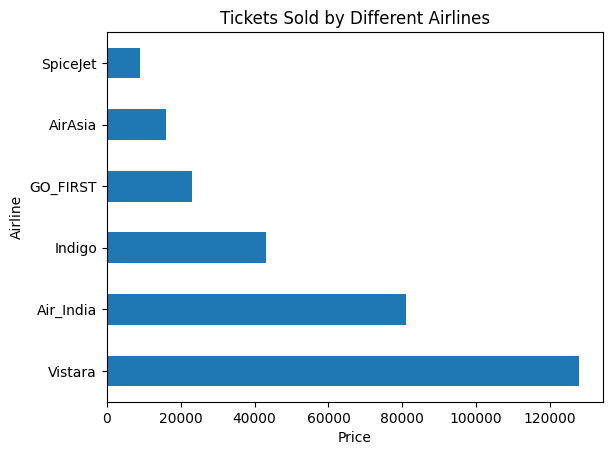

In [9]:
my_data['airline'].value_counts().plot(kind='barh')
plt.title('Tickets Sold by Different Airlines')
plt.xlabel('Price')
plt.ylabel('Airline')

**Question 1: Does price vary with Airlines?**


Text(0, 0.5, 'Price')

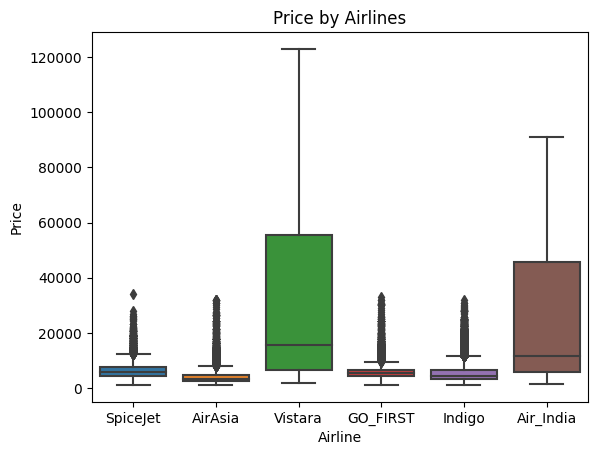

In [10]:
sns.boxplot(x='airline', y='price', data=my_data)
plt.title('Price by Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')

Answer: It seems that Vistara and Air India have a higher price range.

**Q2 How is the price affected when tickets are bought in just 1 or 2 days before departure?**

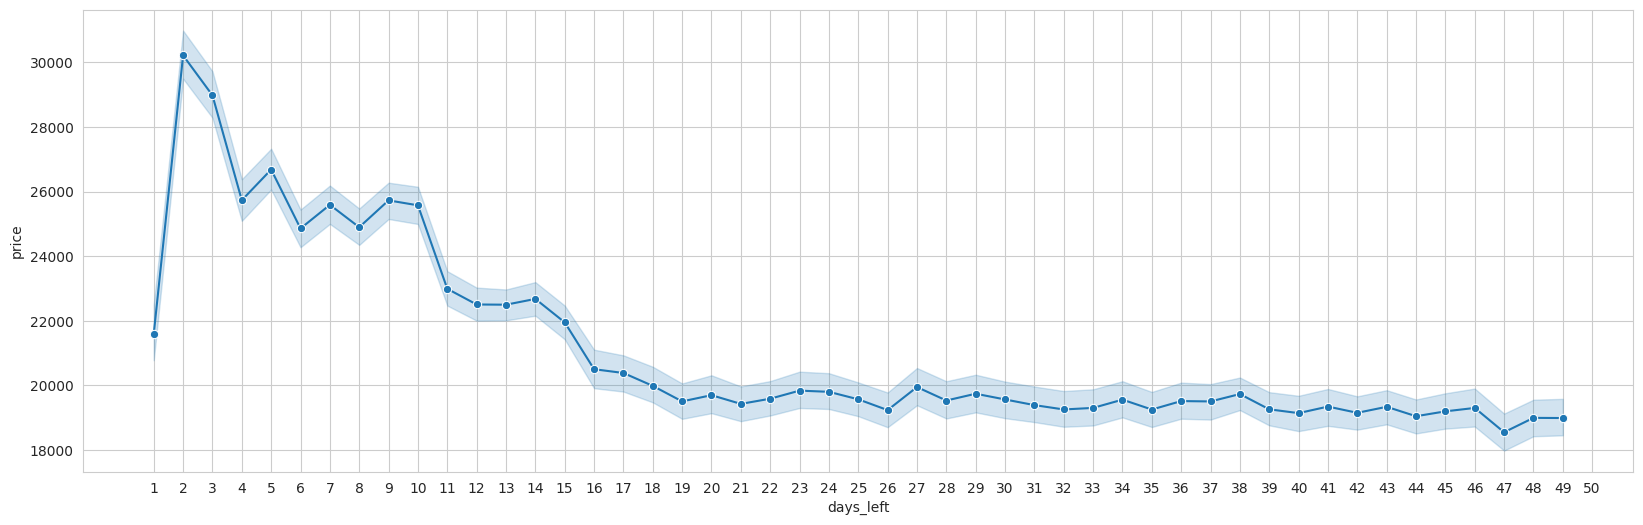

In [14]:
plt.figure(figsize=(20,6))
g = sns.lineplot(x='days_left', y='price', data=my_data, marker='o')
g.set_xticks(range(1,51, 1))
plt.show()

Answer: On average ticket prices are the highest when bought 2 days before a flight

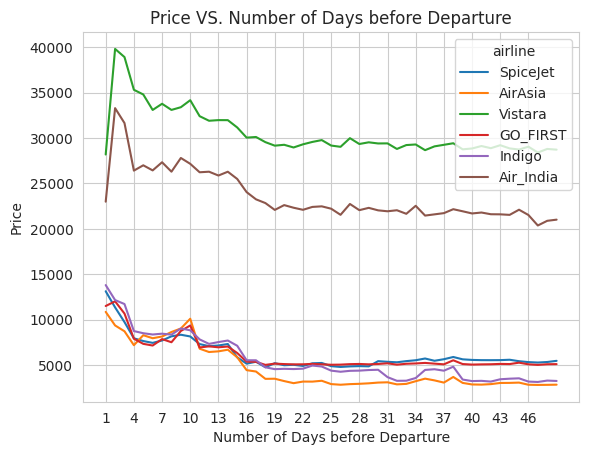

In [11]:

sns.set_style('whitegrid')
sns.lineplot(x='days_left', y='price', hue='airline', data=my_data, errorbar=None)
plt.xticks(range(my_data['days_left'].min(), my_data['days_left'].max(), 3))
plt.title('Price VS. Number of Days before Departure')
plt.ylabel('Price')
plt.xlabel('Number of Days before Departure');

1.   As we can see from the chart, when there are one or two days remaining for departure, the ticket price is higher than others, regardless of Airline.
2.   But maybe because of different price strategy, ticket price at
Vistara and Air India in the last day is significant lower than two days before departure.



**Question 3: Does ticket price change based on the departure time and arrival time?**

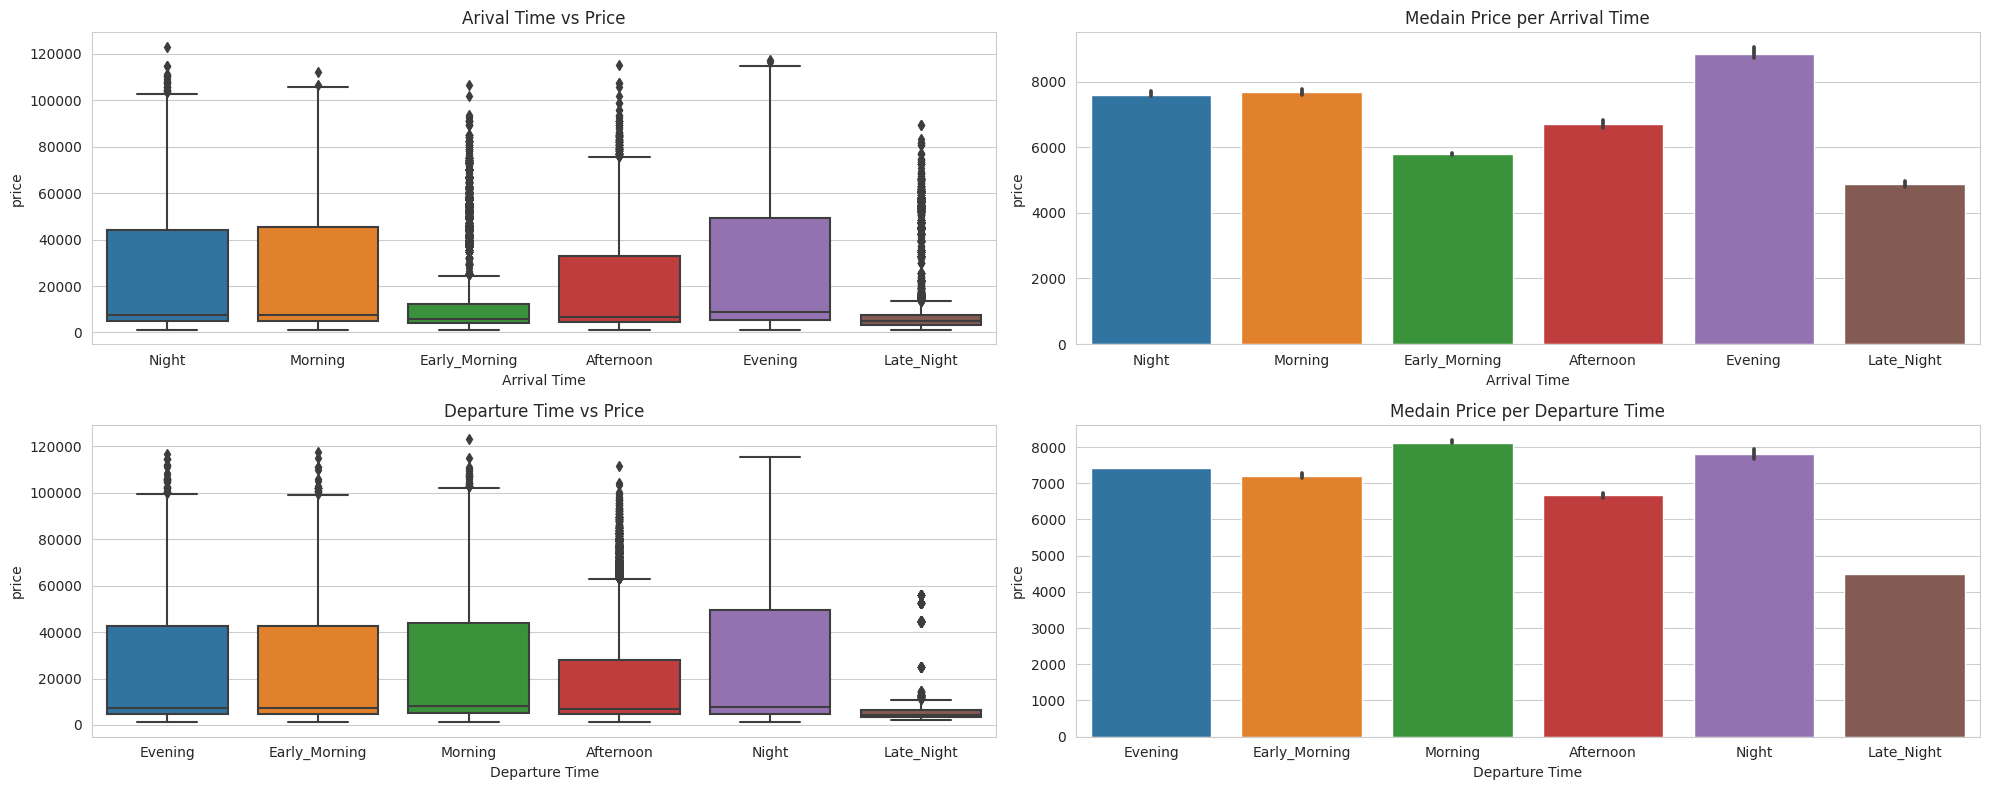

In [18]:
fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.boxplot(x='arrival_time', y='price', data=my_data, ax=ax[0,0])
ax[0,0].set_title('Arival Time vs Price')
ax[0,0].set_xlabel('Arrival Time')

sns.barplot(x='arrival_time', y='price', data=my_data, estimator='median', ax=ax[0,1])
ax[0,1].set_title('Medain Price per Arrival Time')
ax[0,1].set_xlabel('Arrival Time')

sns.boxplot(x='departure_time', y='price', data=my_data, ax=ax[1,0])
ax[1,0].set_title('Departure Time vs Price')
ax[1,0].set_xlabel('Departure Time')

sns.barplot(x='departure_time', y='price', data=my_data, estimator='median', ax=ax[1,1])
ax[1,1].set_title('Medain Price per Departure Time')
ax[1,1].set_xlabel('Departure Time')

fig.tight_layout()
plt.show()

Answers:


1.   Early Morning arrivals seem to have a lower price range and median price overall
2.   Late night arrival have the smallest price range and the lowest median price overall
1.   Late night departures alsos have the smalles price range and smalles median price




**Q4 How the price changes with change in Source and Destination?**


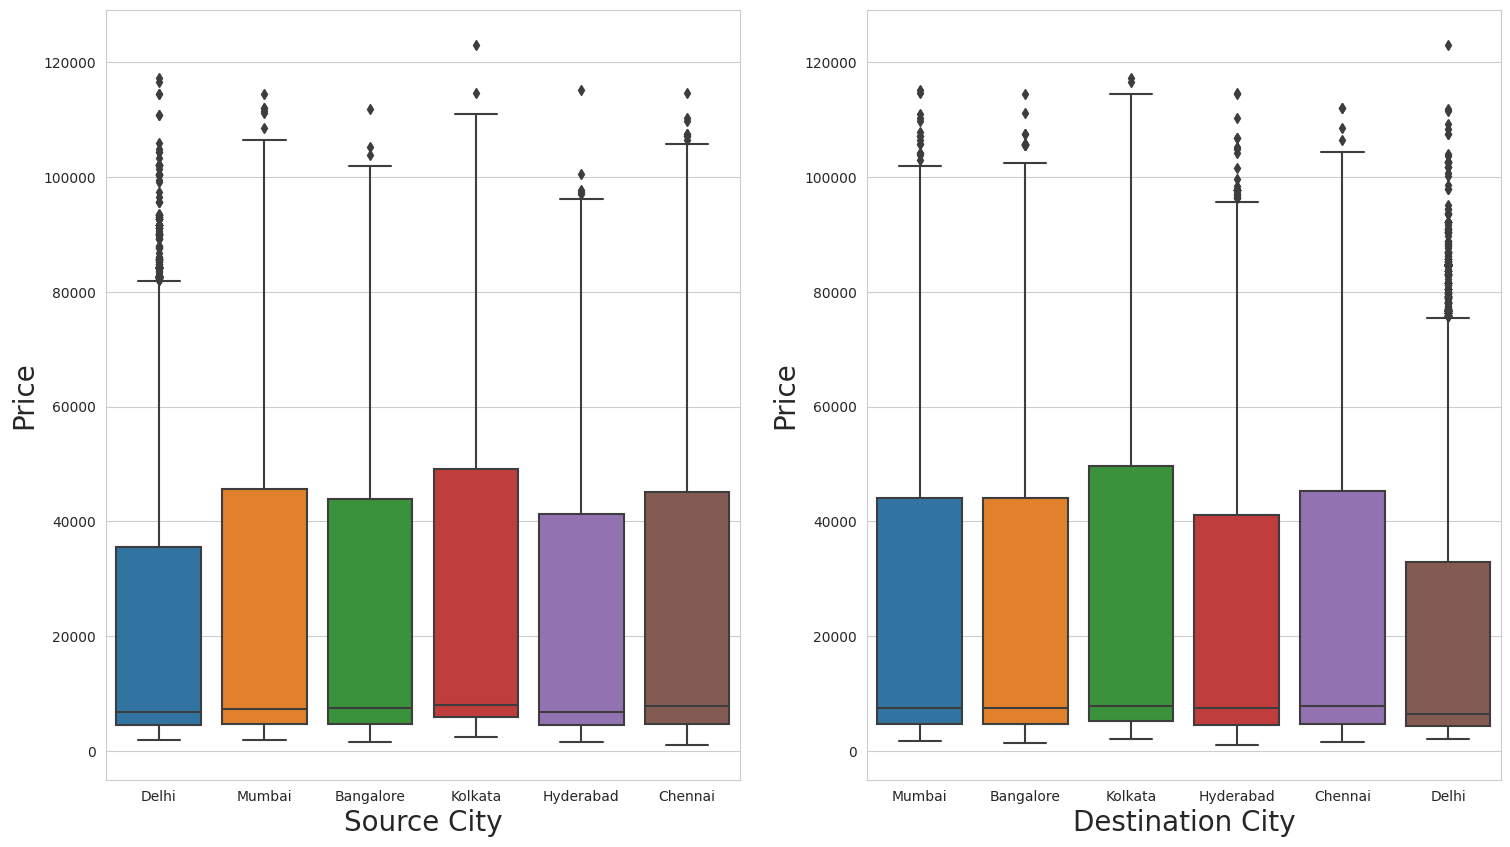

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(x='source_city', y='price', data=my_data, ax=ax1)
ax1.set_xlabel('Source City', fontsize=20)
ax1.set_ylabel('Price', fontsize=20)

sns.boxplot(x='destination_city', y='price', data=my_data, ax=ax2)
ax2.set_xlabel('Destination City', fontsize=20)
ax2.set_ylabel('Price', fontsize=20)

plt.show()

Answer

**QUESTION: How does ticket price vary between Economy and Business Class ?**

Text(0.5, 0, 'Flight Class')

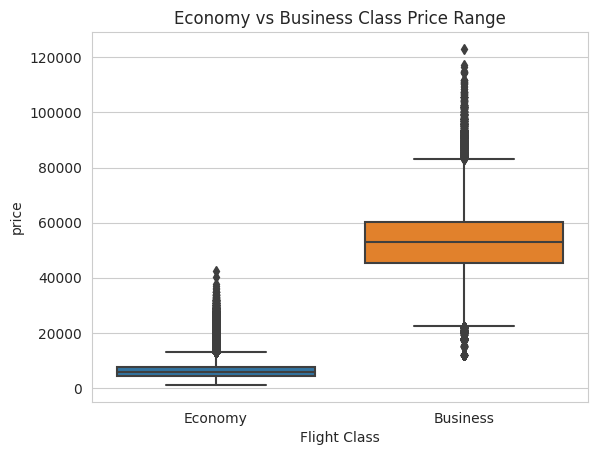

In [23]:
g = sns.boxplot(x='class', y='price', data=my_data)
g.set_title('Economy vs Business Class Price Range')
g.set_xticklabels(['Economy', 'Business'])
g.set_xlabel('Flight Class')

Answer: It is clear that prices are higher in Business Class